In [2]:
 
 import pandas as pd
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import LabelEncoder

In [4]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='VGbBGY-gk0UkzG8tfl-uwIstKugY1UIrgWEqg1XMkSwt',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'pmgsyclassification-donotdelete-pr-oymo4cvwoedh0m'
object_key = 'PMGSY_DATASET.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_0 = pd.read_csv(body)
df_0.head(10)


,STATE_NAME,DISTRICT_NAME,PMGSY_SCHEME,NO_OF_ROAD_WORK_SANCTIONED,LENGTH_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,COST_OF_WORKS_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,LENGTH_OF_ROAD_WORK_COMPLETED,NO_OF_BRIDGES_COMPLETED,EXPENDITURE_OCCURED,NO_OF_ROAD_WORKS_BALANCE,LENGTH_OF_ROAD_WORK_BALANCE,NO_OF_BRIDGES_BALANCE,Unnamed: 14
0,Andaman And Nicobar,Nicobar,PMGSY-I,3,2.969,0,1.38570,3,2.969,0,1.1082,0,0.000,0,NaN
1,Andaman And Nicobar,North and Middle Andaman,PMGSY-I,32,60.169,0,24.69080,32,59.190,0,18.5754,0,0.000,0,NaN
2,Andaman And Nicobar,North and Middle Andaman,PMGSY-II,24,54.670,0,27.76460,0,0.000,0,0.0000,24,54.670,0,NaN
3,Andaman And Nicobar,South Andaman,PMGSY-I,32,40.146,0,18.53750,31,39.287,0,11.6894,1,0.541,0,NaN
4,Andaman And Nicobar,South Andaman,PMGSY-II,24,41.992,0,23.42439,7,17.747,0,8.6343,17,24.033,0,NaN
5,Andhra Pradesh,Anantapur,PMGSY-I,619,2169.505,35,526.12770,619,2126.386,34,517.9120,0,0.000,1,NaN
6,Andhra Pradesh,Anantapur,PMGSY-II,14,125.700,0,56.07110,14,124.619,0,49.0126,0,0.000,0,NaN
7,Andhra Pradesh,Anantapur,PMGSY-III,27,267.158,8,180.52038,24,234.902,0,111.5182,3,23.200,8,NaN
8,Andhra Pradesh,Chittoor,PMGSY-I,283,889.681,6,188.35580,283,878.711,6,185.1493,0,0.000,0,NaN
9,Andhra Pradesh,Chittoor,PMGSY-II,18,126.045,0,57.96680,18,121.403,0,46.1360,0,0.000,0,NaN


In [10]:
 import pandas as pd
 import numpy as np
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import LabelEncoder
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.metrics import classification_report, accuracy_score
 import matplotlib.pyplot as plt
 import seaborn as sns



In [11]:
 print("nMissing values in each column:")
 print(df_0.isnull().sum())

nMissing values in each column:
STATE_NAME                           0
DISTRICT_NAME                        0
PMGSY_SCHEME                         0
NO_OF_ROAD_WORK_SANCTIONED           0
LENGTH_OF_ROAD_WORK_SANCTIONED       0
NO_OF_BRIDGES_SANCTIONED             0
COST_OF_WORKS_SANCTIONED            52
NO_OF_ROAD_WORKS_COMPLETED           0
LENGTH_OF_ROAD_WORK_COMPLETED        0
NO_OF_BRIDGES_COMPLETED              0
EXPENDITURE_OCCURED                  0
NO_OF_ROAD_WORKS_BALANCE             0
LENGTH_OF_ROAD_WORK_BALANCE          0
NO_OF_BRIDGES_BALANCE                0
Unnamed: 14                       2189
dtype: int64


In [12]:
 df_0.fillna(0, inplace=True)

In [23]:
for col in df_0.columns:
    if df_0[col].dtype=='object':
        df_0[col]= LabelEncoder().fit_transform(df_0[col].astype(str))

In [24]:
 label_encoder = LabelEncoder()
 df_0['PMGSY_SCHEME'] = label_encoder.fit_transform(df_0['PMGSY_SCHEME'])

In [25]:
 print("nUnique PMGSY_SCHEME values:")
 print(label_encoder.classes_)

nUnique PMGSY_SCHEME values:
[0 1 2 3 4]


In [26]:
 X = df_0.drop('PMGSY_SCHEME', axis=1)
 y = df_0['PMGSY_SCHEME']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
 model = RandomForestClassifier(n_estimators=100, random_state=42)
 model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
accuracy=model.score(X_test,y_test)
print(f"Moddel Accuracy:{accuracy:.2f}")

Moddel Accuracy:0.89


In [32]:
y_pred = model.predict(X_test)

In [34]:
 print("nClassification Report:")
target_names=[str(cls) for cls in label_encoder.classes_]
 print(classification_report(y_test, y_pred, target_names=target_names))
 print("Accuracy:", accuracy_score(y_test, y_pred))

nClassification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.96      0.92      0.94       143
           2       0.85      0.94      0.89       128
           3       0.86      0.87      0.87       150
           4       0.50      0.09      0.15        11

    accuracy                           0.89       438
   macro avg       0.83      0.76      0.77       438
weighted avg       0.88      0.89      0.88       438

Accuracy: 0.8881278538812786


In [35]:
 feature_importances = model.feature_importances_
 features = X.columns
 indices = np.argsort(feature_importances)[::-1]

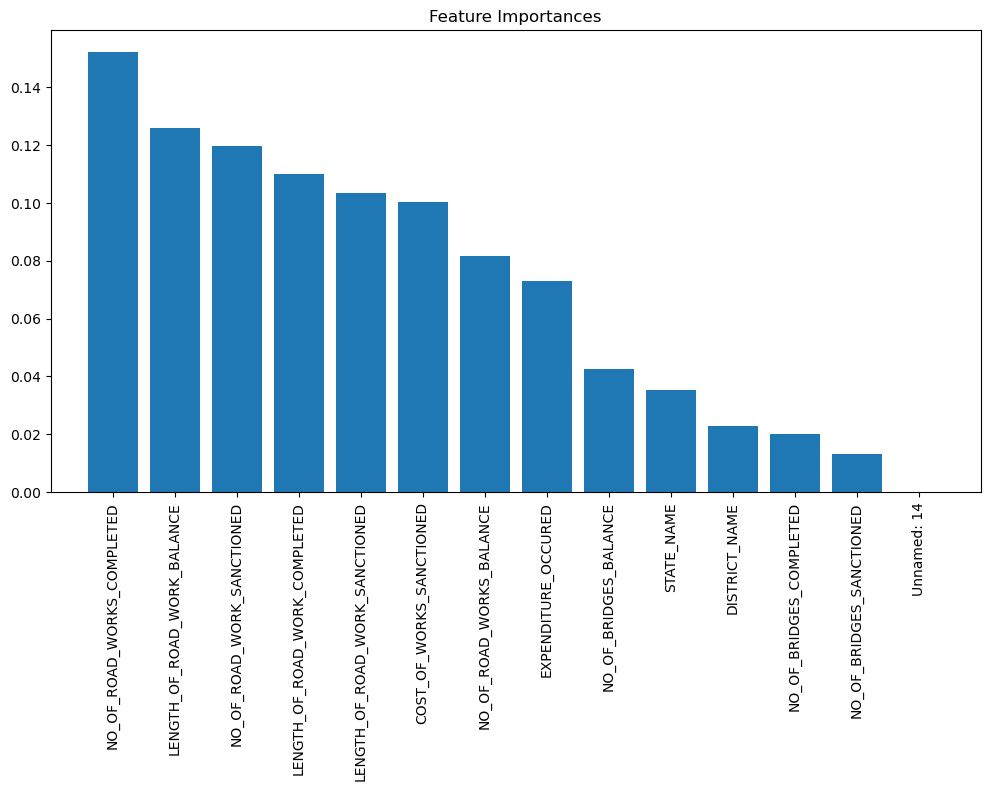

In [37]:
 plt.figure(figsize=(12, 6))
 plt.title("Feature Importances")
 plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
 plt.xticks(range(X.shape[1]), features[indices], rotation=90)
 plt.xlim([-1, X.shape[1]])
 plt.show()

In [1]:
!pip install pandas scikit-learn matplotlib seaborn numpy

Defaulting to user installation because normal site-packages is not writeable


--- 1. Data Loading and Initial Exploration ---
Dataset loaded successfully.

First 5 rows of the dataset:
            STATE_NAME             DISTRICT_NAME PMGSY_SCHEME  \
0  Andaman And Nicobar                   Nicobar      PMGSY-I   
1  Andaman And Nicobar  North and Middle Andaman      PMGSY-I   
2  Andaman And Nicobar  North and Middle Andaman     PMGSY-II   
3  Andaman And Nicobar             South Andaman      PMGSY-I   
4  Andaman And Nicobar             South Andaman     PMGSY-II   

   NO_OF_ROAD_WORK_SANCTIONED  LENGTH_OF_ROAD_WORK_SANCTIONED  \
0                           3                           2.969   
1                          32                          60.169   
2                          24                          54.670   
3                          32                          40.146   
4                          24                          41.992   

   NO_OF_BRIDGES_SANCTIONED  COST_OF_WORKS_SANCTIONED  \
0                         0                   1.38570 

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 14']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Model training complete.

--- 4. Model Evaluation ---

Accuracy: 0.8858

Classification Report:
              precision    recall  f1-score   support

   PM-JANMAN       1.00      1.00      1.00        10
     PMGSY-I       0.96      0.92      0.94       141
    PMGSY-II       0.82      0.93      0.87       137
   PMGSY-III       0.88      0.86      0.87       139
     RCPLWEA       1.00      0.09      0.17        11

    accuracy                           0.89       438
   macro avg       0.93      0.76      0.77       438
weighted avg       0.89      0.89      0.88       438


Confusion Matrix:


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 14']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


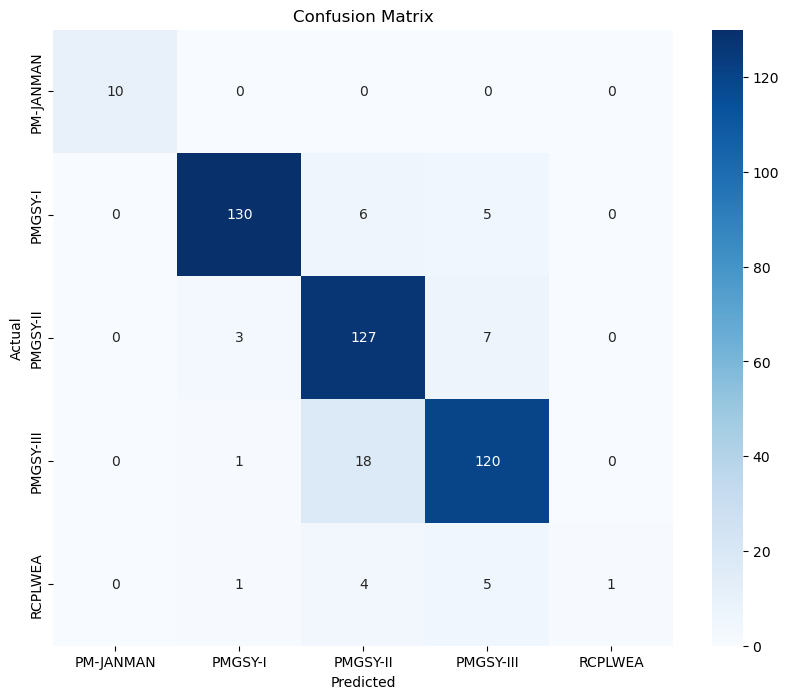


--- 5. Feature Importance ---
Could not display feature importances: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
This might happen if the model is not a tree-based model or if there's an issue with feature name retrieval.

--- 6. Example Prediction ---

New hypothetical project data for prediction:
     NO_OF_ROAD_WORK_SANCTIONED  LENGTH_OF_ROAD_WORK_SANCTIONED  \
353                          20                         149.625   

     NO_OF_BRIDGES_SANCTIONED  COST_OF_WORKS_SANCTIONED  \
353                         6                 140.08068   

     NO_OF_ROAD_WORKS_COMPLETED  LENGTH_OF_ROAD_WORK_COMPLETED  \
353                          15                         95.785   

     NO_OF_BRIDGES_COMPLETED  EXPENDITURE_OCCURED  Unnamed: 14  
353                        0              50.2299          NaN  

Predicted PMGSY_SCHEME for the new project: PMGSY-III

Project execution complete.


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 14']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# --- 1. Data Loading and Initial Exploration ---
print("--- 1. Data Loading and Initial Exploration ---")
try:
    # Assuming the CSV file is in the same directory as your Jupyter Notebook
    df = pd.read_csv('PMGSY_DATASET.csv')
    print("Dataset loaded successfully.")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    print("\nDataset Info:")
    df.info()
    print("\nMissing values before preprocessing:")
    print(df.isnull().sum())
except FileNotFoundError:
    print("Error: 'PMGSY_DATASET.csv' not found. Please ensure the file is in the correct path.")
    print("Please download the dataset from the provided AI Kosh link and place it in 'MultipleFiles/' directory relative to your notebook.")
    exit()  # Exit if the file is not found

# --- 2. Data Preprocessing ---
print("\n--- 2. Data Preprocessing ---")

# Identify target variable and features
TARGET_COLUMN = 'PMGSY_SCHEME'
# Drop STATE_NAME and DISTRICT_NAME as they are identifiers and might lead to overfitting
# We also drop balance columns as they might introduce data leakage.
X = df.drop(columns=[TARGET_COLUMN, 'STATE_NAME', 'DISTRICT_NAME',
                     'NO_OF_ROAD_WORKS_BALANCE', 'LENGTH_OF_ROAD_WORK_BALANCE', 'NO_OF_BRIDGES_BALANCE'])
y = df[TARGET_COLUMN]

# Identify numerical and categorical columns for preprocessing
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

print(f"\nNumerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing numerical values with median
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

print("\nPreprocessing pipelines created.")

# --- 3. Model Selection and Training ---
print("\n--- 3. Model Selection and Training ---")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Define the model (Random Forest Classifier is a good choice for tabular data)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))])  # Use class_weight for imbalanced classes

print("\nModel (RandomForestClassifier) pipeline created.")

# Train the model
print("Training the model...")
model.fit(X_train, y_train)
print("Model training complete.")

# --- 4. Model Evaluation ---
print("\n--- 4. Model Evaluation ---")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# --- 5. Feature Importance (for Random Forest) ---
print("\n--- 5. Feature Importance ---")
try:
    # Get feature names after one-hot encoding
    ohe_feature_names = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
    all_feature_names = numerical_cols + list(ohe_feature_names)

    # Get feature importances from the trained classifier
    importances = model.named_steps['classifier'].feature_importances_
    feature_importances = pd.Series(importances, index=all_feature_names)

    # Sort feature importances and plot
    top_features = feature_importances.nlargest(20)  # Display top 20 features
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
    plt.title('Top 20 Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
except Exception as e:
    print(f"Could not display feature importances: {e}")
    print("This might happen if the model is not a tree-based model or if there's an issue with feature name retrieval.")

# --- 6. Example Prediction (Optional) ---
print("\n--- 6. Example Prediction ---")

if not df.empty:
    # Select a random row from the original dataframe for demonstration
    sample_row = df.sample(1, random_state=1).drop(columns=[TARGET_COLUMN, 'STATE_NAME', 'DISTRICT_NAME',
                                                            'NO_OF_ROAD_WORKS_BALANCE', 'LENGTH_OF_ROAD_WORK_BALANCE', 'NO_OF_BRIDGES_BALANCE'])
    
    # Modify some values to make it a "new" project
    sample_row['LENGTH_OF_ROAD_WORK_SANCTIONED'] = sample_row['LENGTH_OF_ROAD_WORK_SANCTIONED'] * 1.5
    sample_row['COST_OF_WORKS_SANCTIONED'] = sample_row['COST_OF_WORKS_SANCTIONED'] * 1.8
    sample_row['NO_OF_ROAD_WORK_SANCTIONED'] = sample_row['NO_OF_ROAD_WORK_SANCTIONED'] + 5
    
    print("\nNew hypothetical project data for prediction:")
    print(sample_row)

    # Predict the scheme for the new project
    predicted_scheme = model.predict(sample_row)
    print(f"\nPredicted PMGSY_SCHEME for the new project: {predicted_scheme[0]}")
else:
    print("Cannot perform example prediction as the dataframe is empty or not loaded.")

print("\nProject execution complete.")
